In [1]:
num_of_lines=800

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

patient_level__ver_12_proj1_sn_5_13=pd.read_excel("patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
#Demo_patient_week1_23=pd.read_excel("C:/Users/97254/Downloads/Demo_patient_week1_23.12.xlsx", engine='openpyxl')
#Demo_Patient_level_feeding_Daily_19 = pd.read_csv("C:/Users/97254/Downloads/Demo_Patient_level_feeding_Daily_19.11.csv",encoding='latin-1')

#Demo_metabolic = pd.DataFrame(Demo_metabolic.iloc[:num_of_lines, :3])
#dataap1 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, :1])
#dataap2 = pd.DataFrame(Demo_patient_week1_23.iloc[:num_of_lines, 43:45])

#data2['Weight_adm']=data2['Weight_adm']/data2['Height']
#data2= pd.DataFrame(data2.iloc[:10, :2])

#Demo_patient_week1_23=pd.concat([dataap1,dataap2],axis=1)
patient_level__ver_12_proj1_sn_5_13=pd.DataFrame(patient_level__ver_12_proj1_sn_5_13.iloc[:num_of_lines, :])


print(patient_level__ver_12_proj1_sn_5_13.shape)
patient_level__ver_12_proj1_sn_5_13.head()


(800, 70)


,ser_num,ICU_LOS,LOS_Group,ICU_mortality,HOSP_mortality,28_mortality,90 days mortality,trauma,metabolic,gastrointestinal,...,EN_pro_day12,PN_pro_day12,EN_pro_day13,PN_pro_day13,EN_pro_day0/kg,EN_pro_day1/kg,EN_pro_day2/kg,EN_pro_day3/kg,EN_pro_day4/kg,EN_pro_day5/kg
0,2,9,LOS_8-13,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,1.250297,1.221456,1.578462,0.995015,1.394308,1.403077
1,3,5,LOS_5-7,0,0,0,0,0,1,0,...,0.0,0.000000,0.0,0.0,0.758495,0.000000,0.670993,1.177788,0.403229,0.000000
2,5,13,LOS_8-13,0,0,0,0,0,0,1,...,0.0,53.273355,0.0,0.0,0.000000,0.000000,0.023259,1.396370,0.256457,0.000000
3,7,6,LOS_5-7,0,0,0,0,0,1,1,...,0.0,0.000000,0.0,0.0,1.145278,1.520000,1.520000,1.520000,1.520000,1.209667
4,9,9,LOS_8-13,0,0,0,0,1,1,1,...,0.0,0.000000,0.0,0.0,0.014902,0.858353,0.731984,0.922729,1.287529,1.287529


In [3]:
patient_level__ver_12_proj1_sn_5_13 = patient_level__ver_12_proj1_sn_5_13.dropna(axis=0)
print(patient_level__ver_12_proj1_sn_5_13.shape)

(800, 70)


In [4]:
patient_level__ver_12_proj1_sn_5_13.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Length: 800, dtype: int64

In [5]:
df = patient_level__ver_12_proj1_sn_5_13[~patient_level__ver_12_proj1_sn_5_13['age'].isin(['NAN'])]

In [6]:
df.isnull().sum(axis = 0)

ser_num           0
ICU_LOS           0
LOS_Group         0
ICU_mortality     0
HOSP_mortality    0
                 ..
EN_pro_day1/kg    0
EN_pro_day2/kg    0
EN_pro_day3/kg    0
EN_pro_day4/kg    0
EN_pro_day5/kg    0
Length: 70, dtype: int64

In [7]:
df = df.dropna(how='any')

In [8]:
x1 = df[['age','BMI','APACHEII','trauma','metabolic','gastrointestinal','Sepsis','EN_pro_day0','EN_pro_day1','EN_pro_day2','EN_pro_day3','EN_pro_day4','EN_pro_day5']]
print(x1.shape)

(760, 13)


In [9]:
x1.head(100)

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0,EN_pro_day1,EN_pro_day2,EN_pro_day3,EN_pro_day4,EN_pro_day5
0,72,23.875115,16,0,1,0,1,81.269334,79.394668,102.600000,64.676002,90.630000,91.200000
1,58,32.979592,23,0,1,0,1,76.608002,0.000000,67.770277,118.956574,40.726105,0.000000
2,44,22.857143,0,0,0,1,1,0.000000,0.000000,1.628126,97.745868,17.951996,0.000000
3,71,19.227688,0,0,1,1,0,54.973335,72.960001,72.960001,72.960000,72.960000,58.064001
4,60,32.791945,17,1,1,1,0,1.266667,72.960000,62.218668,78.432001,109.440000,109.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,77,21.224490,0,0,1,0,1,0.000000,0.000000,9.954000,0.000000,0.000000,0.000000
100,25,21.829952,0,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
101,39,23.437500,0,0,0,1,1,43.868001,62.832000,57.200000,21.252000,22.352000,27.705333
103,76,27.343750,24,0,0,1,1,34.261333,42.240000,50.221333,72.960000,76.756240,99.752442


In [10]:
target = df[['ICU_mortality']]

target.head()

,ICU_mortality
0,0
1,0
2,0
3,0
4,0


In [11]:
x1.head(100)

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0,EN_pro_day1,EN_pro_day2,EN_pro_day3,EN_pro_day4,EN_pro_day5
0,72,23.875115,16,0,1,0,1,81.269334,79.394668,102.600000,64.676002,90.630000,91.200000
1,58,32.979592,23,0,1,0,1,76.608002,0.000000,67.770277,118.956574,40.726105,0.000000
2,44,22.857143,0,0,0,1,1,0.000000,0.000000,1.628126,97.745868,17.951996,0.000000
3,71,19.227688,0,0,1,1,0,54.973335,72.960001,72.960001,72.960000,72.960000,58.064001
4,60,32.791945,17,1,1,1,0,1.266667,72.960000,62.218668,78.432001,109.440000,109.440000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,77,21.224490,0,0,1,0,1,0.000000,0.000000,9.954000,0.000000,0.000000,0.000000
100,25,21.829952,0,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
101,39,23.437500,0,0,0,1,1,43.868001,62.832000,57.200000,21.252000,22.352000,27.705333
103,76,27.343750,24,0,0,1,1,34.261333,42.240000,50.221333,72.960000,76.756240,99.752442


LabelEncoder:

In [12]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder=LabelEncoder()
# col='age'
# x1[col] = labelencoder.fit_transform(x1[col].astype(str))
# x1.head()

# train_test_split

In [13]:
from sklearn.model_selection import train_test_split

#this function randomly split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x1, target, test_size=0.2, random_state=1,stratify=target) 

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state=1, stratify=y_train) # 0.125 x 0.8 = 0.1
#test=0.2,train=0.7,val=0.1
x_train.head()

,age,BMI,APACHEII,trauma,metabolic,gastrointestinal,Sepsis,EN_pro_day0,EN_pro_day1,EN_pro_day2,EN_pro_day3,EN_pro_day4,EN_pro_day5
590,55,25.249337,0,1,0,0,0,51.142667,41.389333,63.360000,63.360000,63.360000,63.360000
592,80,20.957171,0,0,1,0,0,47.696001,60.720000,60.720000,63.360000,63.360000,63.360000
406,65,24.221453,0,0,0,1,0,35.137333,60.369333,72.960000,96.317333,73.806667,42.240000
233,64,25.711662,0,0,0,1,0,57.278000,89.280000,89.280000,76.508000,89.280000,89.280000
695,38,29.387755,0,0,0,0,0,9.809483,72.979850,4.813334,0.000000,26.621334,54.270001


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def stats(y_test,y_pred):
    accuracy=accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
    score = f1_score(y_test, y_pred, average='binary')
    print('accuracy_score: %.3f' % accuracy)
    print('recall: %.3f' % recall)
    print('precision: %.3f' % precision)
    print('F-Measure: %.3f' % score)
    print('roc_auc_score: %.3f' % roc_auc_score(y_test,y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
    print('auc score: %.3f' % metrics.auc(fpr, tpr))

In [15]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection # for command model_selection.cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV


In [16]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



results = []
names = []
for name, model in models:
    
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)

#     clf = GridSearchCV(model, x_train , scoring='recall')
#     best_model = clf.fit(x_train, y_train)  
#     y_pred = best_model.predict(x_test)
    
    
    print('---------%s---------' % name)
    stats(y_test,y_pred)



C:\Users\Almog\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Almog\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Almog\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to c

---------LR---------
accuracy_score: 0.757
recall: 0.000
precision: 0.000
F-Measure: 0.000
roc_auc_score: 0.500
auc score: nan
---------LDA---------
accuracy_score: 0.750
recall: 0.000
precision: 0.000
F-Measure: 0.000
roc_auc_score: 0.496
auc score: nan
---------KNN---------
accuracy_score: 0.691
recall: 0.081
precision: 0.188
F-Measure: 0.113
roc_auc_score: 0.484
auc score: nan
---------DT---------
accuracy_score: 0.645
recall: 0.243
precision: 0.257
F-Measure: 0.250
roc_auc_score: 0.509
auc score: nan
---------RF---------
accuracy_score: 0.711
recall: 0.027
precision: 0.111
F-Measure: 0.043
roc_auc_score: 0.479
auc score: nan
---------NB---------
accuracy_score: 0.678
recall: 0.162
precision: 0.250
F-Measure: 0.197
roc_auc_score: 0.503
auc score: nan
---------SVM---------
accuracy_score: 0.757
recall: 0.000
precision: 0.000
F-Measure: 0.000
roc_auc_score: 0.500
auc score: nan


C:\Users\Almog\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Almog\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Almog\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\Users\Almog\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Almog\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetri

# DecisionTreeClassifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)  #train parameters: features and target
pred = dtree.predict(x_test)  #parameter: new data to predict

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy_score=accuracy_score(y_test, pred)
recall = recall_score(y_test, pred, average='binary')
precision = precision_score(y_test, pred, average='binary')
score = f1_score(y_test, pred, average='binary')
print('accuracy_score: %.3f' % accuracy_score)
print('recall: %.3f' % recall)
print('precision: %.3f' % precision)
print('F-Measure: %.3f' % score)
#parameters: targets to be predicted and predictions from new data used before

accuracy_score: 0.684
recall: 0.243
precision: 0.310
F-Measure: 0.273


# RandomForestClassifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf_4 = RandomForestClassifier()
clf_4.fit(x_train, y_train)
pred_y_4 = clf_4.predict(x_test)
 
print( np.unique( pred_y_4 ) )
 
recall2 = recall_score(y_test, pred, average='binary')
precision2 = precision_score(y_test, pred, average='binary')
score2 = f1_score(y_test, pred, average='binary')
print('recall: %.3f' % recall2)
print('precision: %.3f' % precision2)
print('F-Measure: %.3f' % score2)

[0 1]
recall: 0.243
precision: 0.310
F-Measure: 0.273


C:\Users\Almog\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


# visual tree:

In [20]:
dtree2 = DecisionTreeClassifier(criterion='entropy')
dtree2.fit(x_train, y_train)
pred = dtree2.predict(x_test)
print('Criterion=entropy', recall_score(y_test, pred))
print('Criterion=entropy', precision_score(y_test, pred))
print('Criterion=entropy', f1_score(y_test, pred))

Criterion=entropy 0.32432432432432434
Criterion=entropy 0.3076923076923077
Criterion=entropy 0.3157894736842105


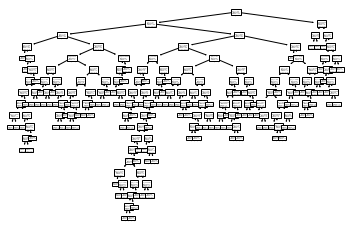

In [21]:
from sklearn import tree
tree.plot_tree(dtree);

explore by depth

In [22]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,5):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(recall_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(recall_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters

In [23]:
d.head(20)

,acc_gini,acc_entropy,max_depth
0,0.081081,0.000000,1
1,0.000000,0.081081,2
2,0.081081,0.000000,3
3,0.000000,0.081081,4


In [24]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
recall_score(y_test, pred)


0.0

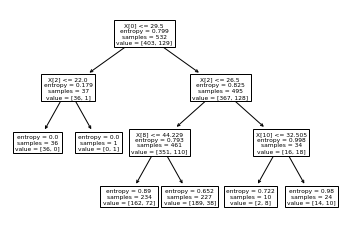

In [25]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
recall_score(y_test, pred)
from sklearn import tree
tree.plot_tree(dtree);

# pycaret

In [14]:
import sys
!{sys.executable} -m pip install pycaret

You should consider upgrading via the 'C:\Users\Almog\anaconda3\python.exe -m pip install --upgrade pip' command.


In [15]:
import pandas as pd
import numpy as np
dataset=pd.read_excel("patient_level__ver 12_proj1_sn_5-13.xlsx", engine='openpyxl')
print(dataset.shape)

(1020, 70)


In [16]:
dataset = dataset[~dataset['age'].isin(['NAN'])]

In [17]:
dataset.isnull().sum(axis = 0)

ser_num           0
ICU_LOS           0
LOS_Group         0
ICU_mortality     0
HOSP_mortality    0
                 ..
EN_pro_day1/kg    0
EN_pro_day2/kg    0
EN_pro_day3/kg    0
EN_pro_day4/kg    0
EN_pro_day5/kg    0
Length: 70, dtype: int64

In [18]:
dataset = dataset[['ICU_mortality','age','BMI','APACHEII','trauma','metabolic','gastrointestinal','Sepsis','EN_pro_day0','EN_pro_day1','EN_pro_day2','EN_pro_day3','EN_pro_day4','EN_pro_day5']]
print(dataset.shape)

(976, 14)


In [19]:
data = dataset.sample(frac=0.7, random_state=7)
data_unseen = dataset.drop(data.index)

In [20]:
from pycaret.classification import *
model_setup = setup(data=data, target='ICU_mortality', data_split_stratify = True)
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7574,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0120
lr,Logistic Regression,0.7490,0.5917,0.0000,0.0000,0.0000,-0.0156,-0.0282,0.0240
rf,Random Forest Classifier,0.7490,0.5710,0.0674,0.2917,0.1088,0.0464,0.0659,0.2860
lda,Linear Discriminant Analysis,0.7490,0.5889,0.0000,0.0000,0.0000,-0.0156,-0.0282,0.0080
et,Extra Trees Classifier,0.7343,0.5402,0.0924,0.2912,0.1310,0.0378,0.0457,0.2520
gbc,Gradient Boosting Classifier,0.7176,0.5945,0.0932,0.2361,0.1289,0.0121,0.0140,0.0560
knn,K Neighbors Classifier,0.7155,0.5692,0.1621,0.3144,0.2107,0.0628,0.0672,0.0720
lightgbm,Light Gradient Boosting Machine,0.7134,0.5650,0.1364,0.2961,0.1810,0.0407,0.0451,0.0170
qda,Quadratic Discriminant Analysis,0.7070,0.5753,0.2220,0.3467,0.2552,0.0933,0.1002,0.0070
nb,Naive Bayes,0.7050,0.6022,0.2561,0.3681,0.2979,0.1197,0.1245,0.0090


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=533, solver='auto',
                tol=0.001)


In [21]:
#for more info: https://pycaret.org/tune-model/
model = create_model("rf")
tuned_rf = tune_model(model, optimize = 'Recall')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4792,0.4423,0.3636,0.1818,0.2424,-0.0909,-0.1036
1,0.5417,0.7617,1.0000,0.3333,0.5000,0.2381,0.3676
2,0.6667,0.7072,0.5000,0.3750,0.4286,0.2000,0.2041
3,0.5417,0.6400,0.5000,0.2727,0.3529,0.0435,0.0483
4,0.6250,0.6343,0.4167,0.3125,0.3571,0.1000,0.1021
5,0.6042,0.6262,0.5833,0.3333,0.4242,0.1556,0.1697
6,0.5625,0.6829,0.8333,0.3448,0.4878,0.2075,0.2706
7,0.5208,0.5602,0.6667,0.2963,0.4103,0.0980,0.1212
8,0.6170,0.5505,0.4545,0.2941,0.3571,0.1019,0.1068
9,0.5319,0.6237,0.7273,0.2963,0.4211,0.1326,0.1708


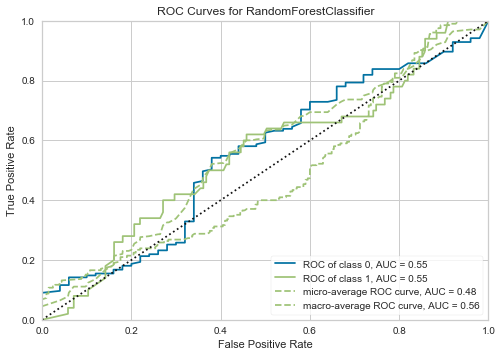

In [22]:
plot_model(tuned_rf, plot = 'auc')

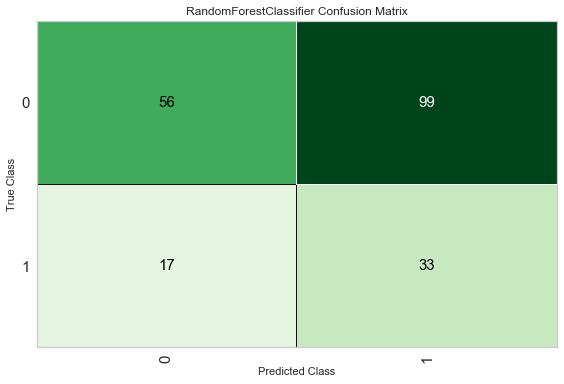

In [23]:
plot_model(tuned_rf, plot = 'confusion_matrix')

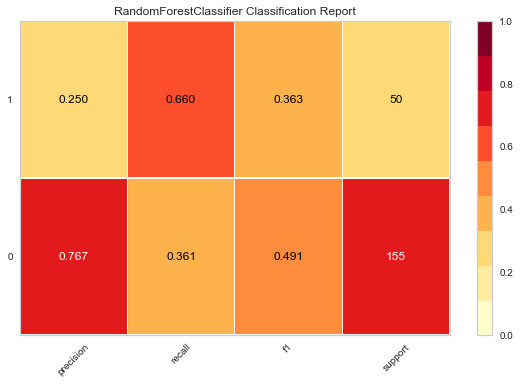

In [24]:
plot_model(tuned_rf, plot = 'class_report')

In [25]:
final_rf = finalize_model(tuned_rf)

predictions =  predict_model(final_rf, data = data_unseen)


saved_rf = save_model(final_rf, 'final-model-rf')

Transformation Pipeline and Model Succesfully Saved
